# Flatiron Modeling Pipeline — Data Exploration

Initial notebook to load the core dataset and perform a quick health check.

In [8]:
import io
import pandas as pd
from IPython.display import display

SECTION_DIVIDER = '=' * 40
SUB_SECTION_DIVIDER = '-' * 40

def print_heading(title: str):
    """Print a visually distinct major section header."""
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    """Print a visually distinct sub-section header."""
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


In [9]:
DATA_PATH = 'data/Dataset.csv'

print_heading('Loading Raw Dataset')
print(f'Reading dataset from: {DATA_PATH}')
df = pd.read_csv(DATA_PATH)
print(f'Dataset loaded successfully with {len(df):,} rows and {len(df.columns)} columns.')

print_heading('Original Data Overview')

print_sub_heading('Data Head (First 5 Rows)')
pd.set_option('display.max_columns', None)
display(df.head())
pd.reset_option('display.max_columns')

print_sub_heading('Dataset Info (Schema & Non-Null Counts)')
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

print_sub_heading('Null Value Counts (Absolute)')
display(df.isnull().sum())

print_sub_heading('Descriptive Statistics (Numeric Columns)')
display(df.describe())

print_heading('Category Distribution Overview')
print_sub_heading('from_category Value Counts')
display(df['from_category'].value_counts(dropna=False))

print_sub_heading('to_category Value Counts')
display(df['to_category'].value_counts(dropna=False))



Loading Raw Dataset

Reading dataset from: data/Dataset.csv
Dataset loaded successfully with 71,250 rows and 18 columns.

Original Data Overview


----------------------------------------
Data Head (First 5 Rows)
----------------------------------------



,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN



----------------------------------------
Dataset Info (Schema & Non-Null Counts)
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71250 entries, 0 to 71249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71250 non-null  object 
 1   nonce                        71250 non-null  int64  
 2   transaction_index            71250 non-null  int64  
 3   from_address                 71250 non-null  object 
 4   to_address                   71250 non-null  object 
 5   value                        71250 non-null  float64
 6   gas                          71250 non-null  int64  
 7   gas_price                    71250 non-null  float64
 8   input                        71250 non-null  object 
 9   receipt_cumulative_gas_used  71250 non-null  int64  
 10  receipt_gas_used             71250 non-null  int64  
 11  block_ti

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
from_scam                          0
to_scam                            0
from_category                  68622
to_category                    59601
dtype: int64


----------------------------------------
Descriptive Statistics (Numeric Columns)
----------------------------------------



,nonce,transaction_index,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,block_number,from_scam,to_scam
count,7.125000e+04,71250.000000,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,71250.000000,71250.000000
mean,3.078713e+05,72.694035,1.002473e+19,6.834562e+04,3.449287e+10,2.946858e+06,2.627084e+04,5.209526e+06,0.036884,0.163495
std,9.978455e+05,64.650247,2.858156e+20,1.335602e+05,1.250177e+11,2.444175e+06,5.131794e+04,7.509279e+05,0.188479,0.369819
min,0.000000e+00,0.000000,0.000000e+00,2.100000e+04,1.000000e+00,2.100000e+04,2.100000e+04,4.370008e+06,0.000000,0.000000
25%,3.000000e+00,21.000000,2.490000e+16,2.100000e+04,8.000000e+09,7.744545e+05,2.100000e+04,4.900821e+06,0.000000,0.000000
50%,8.500000e+01,56.000000,2.480000e+17,3.500000e+04,2.000000e+10,2.338859e+06,2.100000e+04,5.067095e+06,0.000000,0.000000
75%,7.515425e+04,109.000000,1.500000e+18,9.000000e+04,5.060947e+10,4.820330e+06,2.100000e+04,5.285231e+06,0.000000,0.000000
max,1.372920e+07,379.000000,6.000000e+22,9.344755e+06,3.000000e+13,9.991824e+06,6.787079e+06,9.185954e+06,1.000000,1.000000



Category Distribution Overview


----------------------------------------
from_category Value Counts
----------------------------------------



from_category
NaN         68622
Scamming     1402
Phishing     1225
Fake ICO        1
Name: count, dtype: int64


----------------------------------------
to_category Value Counts
----------------------------------------



to_category
NaN         59601
Scamming     9758
Phishing     1891
Name: count, dtype: int64

### Original Ethereum Transaction Data — Feature Dictionary

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| hash | string | Unique transaction hash | context | Not modeled directly; can be used as row ID |
| nonce | int | Per-sender transaction count at time of tx | dropped | Not used in current feature set |
| transaction_index | int | Position of tx within block | dropped | Block-local ordering only |
| from_address | string | Sender address | analysis | Used as key to build per-address features |
| to_address | string | Recipient address | analysis | Used as key to build per-address features |
| value | float | Transferred ETH amount in wei | analysis | Aggregated into incoming/outgoing amount features |
| gas | int | Gas limit specified for tx | analysis | Used for avg gas limit per address |
| gas_price | float | Gas price offered (wei per gas unit) | analysis | Used for avg gas price per address |
| input | string | Hex calldata / payload | dropped | Not parsed in this project |
| receipt_cumulative_gas_used | int | Total gas used in block up to this tx | dropped | Not used in current features |
| receipt_gas_used | int | Gas used by this tx alone | dropped | Redundant with other gas behavior for this analysis |
| block_timestamp | string → datetime | Block time for tx | analysis | Parsed to UTC; basis for all time/sequence features |
| block_number | int | Block height containing tx | dropped | Highly collinear with timestamp; not modeled directly |
| block_hash | string | Hash of containing block | dropped | Not used in current features |
| from_scam | int (0/1) | Source is labeled scam address | analysis | Used to construct per-address Scam label |
| to_scam | int (0/1) | Destination is labeled scam address | analysis | Used to construct per-address Scam label |
| from_category | string | Labeled category for sender | analysis | Used to flag scam/fraud/phish categories |
| to_category | string | Labeled category for recipient | analysis | Used to flag scam/fraud/phish categories |


Section 1 — Dataset Structure & Missingness


----------------------------------------
Purpose
----------------------------------------

These charts show where the dataset has missing values. Missingness patterns help reveal whether labels are random, structured, or biased. Fraud datasets often have sparse labels, and understanding the pattern is critical before training models.

----------------------------------------
Missingness Heatmap
----------------------------------------



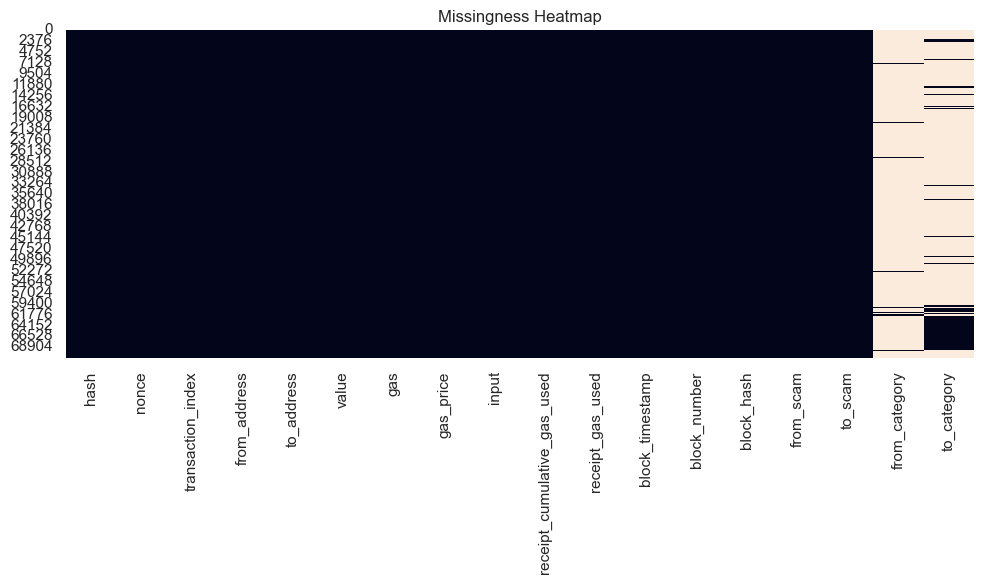


----------------------------------------
Missing Values Per Column
----------------------------------------



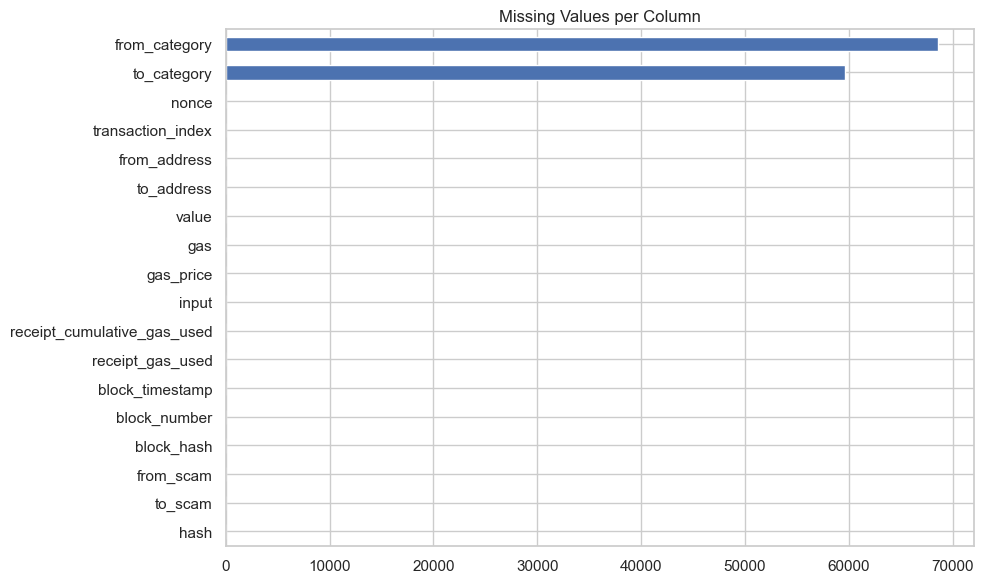


----------------------------------------
Correlation Heatmap (Numeric Columns)
----------------------------------------

This heatmap shows correlations between numerical fields. This helps identify redundant columns, groups of related economic signals, and whether any raw variables are providing overlapping information.


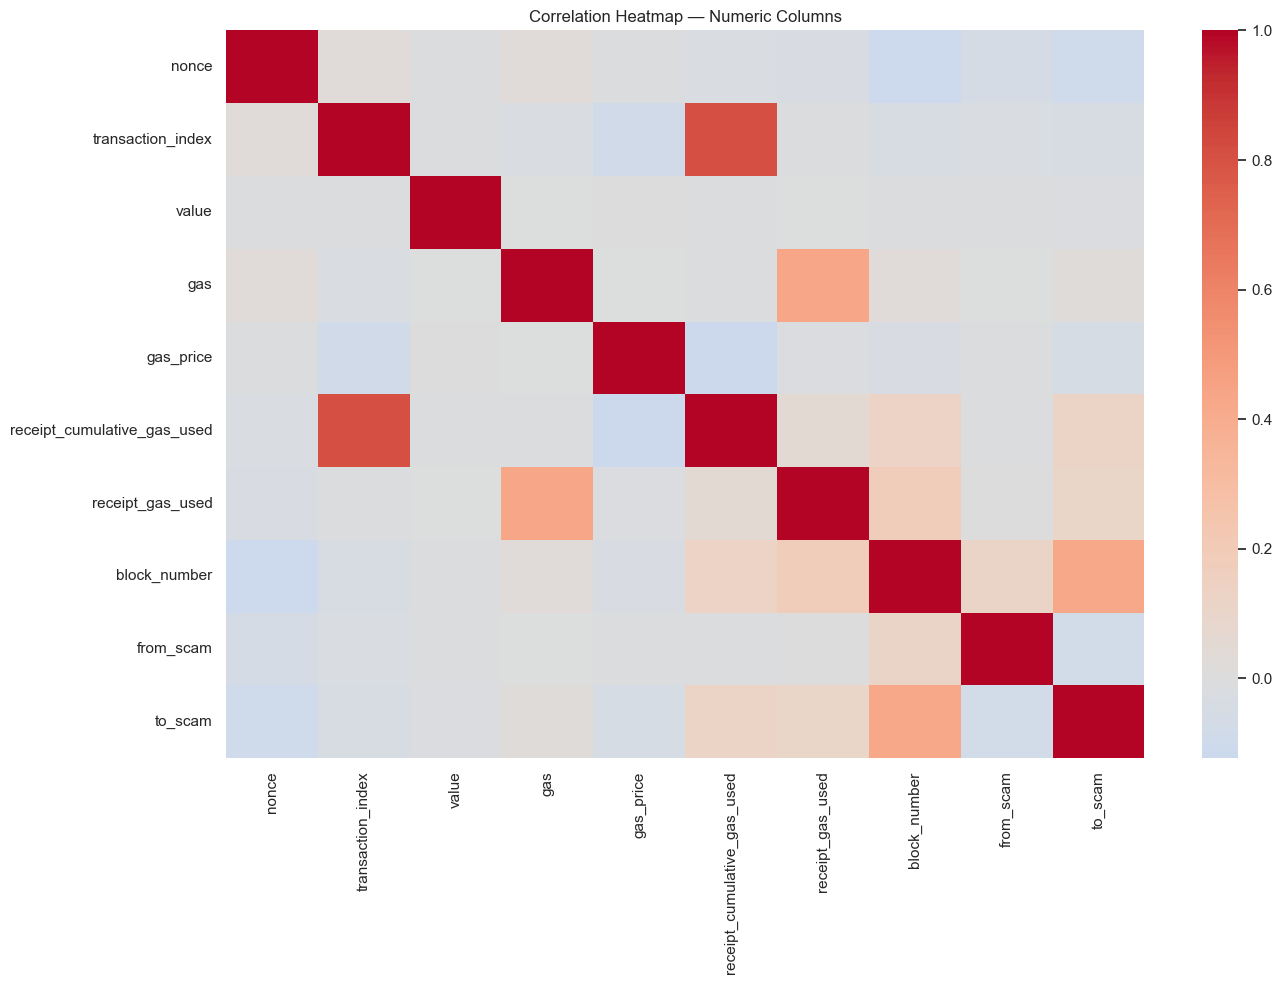

In [ ]:
# -----------------------------------------------------
# Correlation Heatmap (Numeric Columns)
# -----------------------------------------------------

print_sub_heading("Correlation Heatmap (Numeric Columns)")

print(
    "This heatmap shows correlations between numerical fields. "
    "This helps identify redundant columns, groups of related economic signals, "
    "and whether any raw variables are providing overlapping information."
)

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(14,10))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Numeric Columns")
plt.tight_layout()
plt.show()


Section 2 — Timestamp & Temporal Sanity Checks


Preprocessing — Timestamp Normalization


----------------------------------------
Purpose
----------------------------------------

Before running the EDA, we must convert the raw string timestamps into a consistent datetime format. This creates `block_timestamp_dt`, `hour`, and `weekday`, which several EDA charts rely on.
Parsed timestamps: 57000
Unparseable timestamps: 14250

----------------------------------------
Purpose
----------------------------------------

Ethereum block timestamps follow a stable rhythm. These charts confirm dataset coverage, identify gaps, and detect non-realistic sampling patterns.

----------------------------------------
Transaction Timestamp Distribution
----------------------------------------



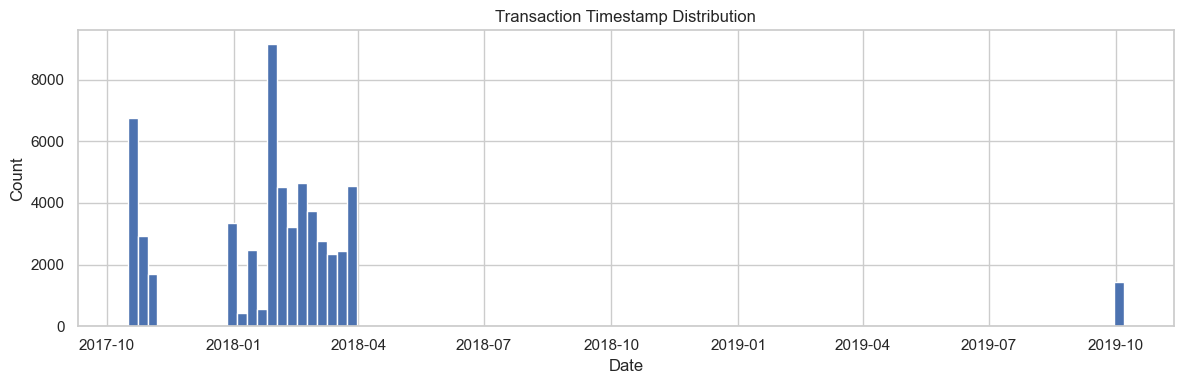


----------------------------------------
Daily Transaction Volume Curve
----------------------------------------



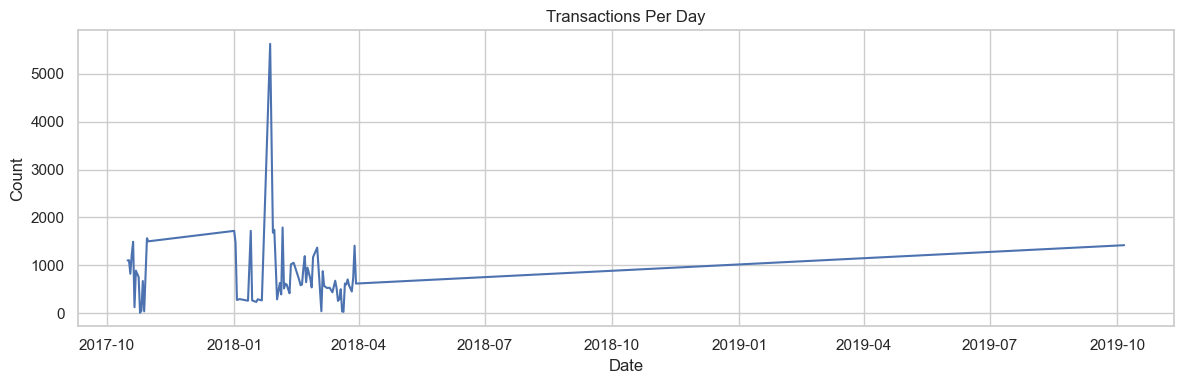


----------------------------------------
Transactions by Hour of Day
----------------------------------------

This chart shows how transaction activity is distributed across hours of the day. Human activity produces peaks; bots produce flat or highly irregular profiles.


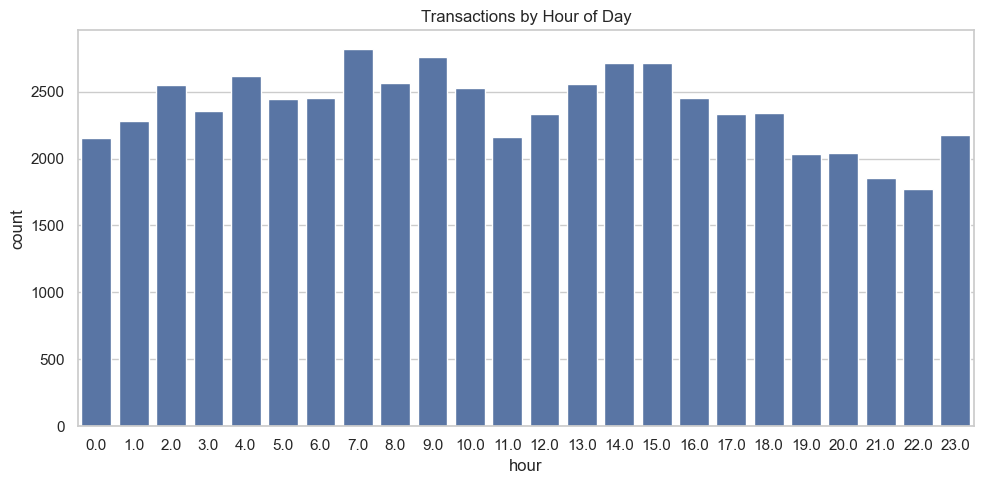


----------------------------------------
Transactions by Day of Week
----------------------------------------

This chart shows weekly activity rhythms. Human activity is cyclical (weekdays vs weekends). Bots and programmatic systems often show no weekly rhythm.


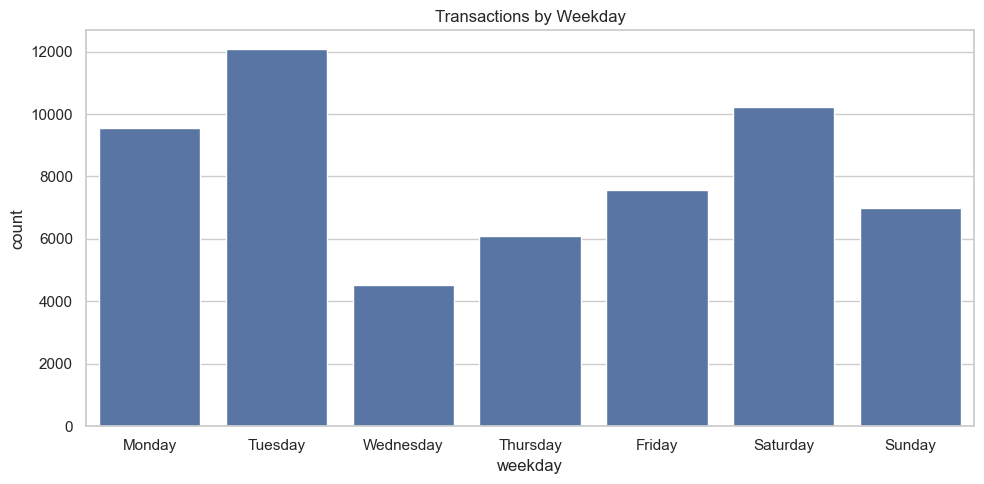


----------------------------------------
Block Interval Anomaly Check
----------------------------------------



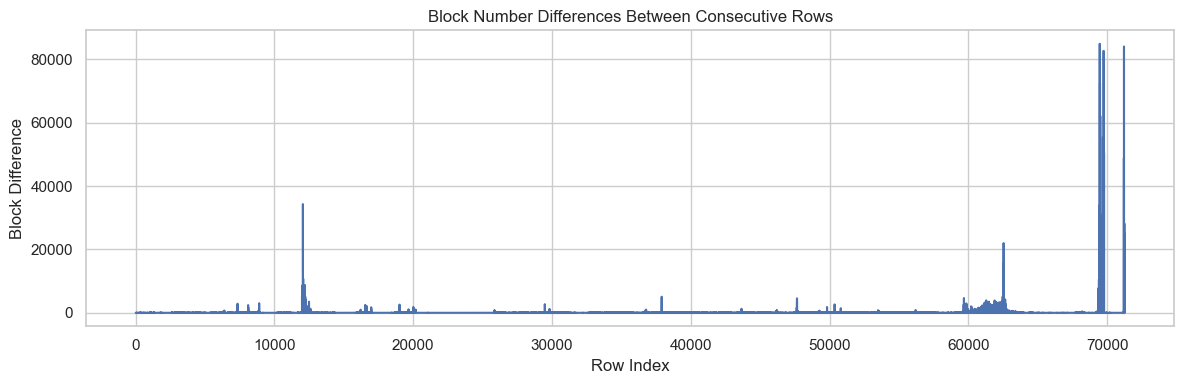

In [ ]:
# %%
print_heading("Section 2 — Timestamp & Temporal Sanity Checks")


# %%
print_heading("Preprocessing — Timestamp Normalization")

print_sub_heading("Purpose")
print(
    "Before running the EDA, we must convert the raw string timestamps into "
    "a consistent datetime format. This creates `block_timestamp_dt`, `hour`, "
    "and `weekday`, which several EDA charts rely on."
)

df['block_timestamp_dt'] = pd.to_datetime(
    df['block_timestamp'].astype(str).str.replace(" UTC", "").str.strip(),
    errors='coerce'
)

df['hour'] = df['block_timestamp_dt'].dt.hour
df['weekday'] = df['block_timestamp_dt'].dt.day_name()

print("Parsed timestamps:", df['block_timestamp_dt'].notna().sum())
print("Unparseable timestamps:", df['block_timestamp_dt'].isna().sum())


print_sub_heading("Purpose")
print(
    "Ethereum block timestamps follow a stable rhythm. "
    "These charts confirm dataset coverage, identify gaps, and detect non-realistic sampling patterns."
)

# Timestamp distribution
print_sub_heading("Transaction Timestamp Distribution")
df['block_timestamp_dt'].hist(bins=100, figsize=(12,4))
plt.title("Transaction Timestamp Distribution")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Daily volume
print_sub_heading("Daily Transaction Volume Curve")
daily = df.groupby(df['block_timestamp_dt'].dt.date).size()
plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title("Transactions Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Hour-of-Day Activity Pattern
# -----------------------------------------------------

print_sub_heading("Transactions by Hour of Day")

print(
    "This chart shows how transaction activity is distributed across hours of the day. "
    "Human activity produces peaks; bots produce flat or highly irregular profiles."
)

sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour of Day")
plt.tight_layout()
plt.show()


# -----------------------------------------------------
# Day-of-Week Activity Pattern
# -----------------------------------------------------

print_sub_heading("Transactions by Day of Week")

print(
    "This chart shows weekly activity rhythms. "
    "Human activity is cyclical (weekdays vs weekends). "
    "Bots and programmatic systems often show no weekly rhythm."
)

sns.countplot(
    x='weekday',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Transactions by Weekday")
plt.tight_layout()
plt.show()




Section 3 — Intertransaction Gaps


----------------------------------------
Purpose
----------------------------------------

Time gaps between transactions reveal whether activity is human-paced or bot-like. Fraudulent wallets often show bursty patterns with very short or very uniform gaps.

----------------------------------------
Intertransaction Gap Distribution (log histogram)
----------------------------------------



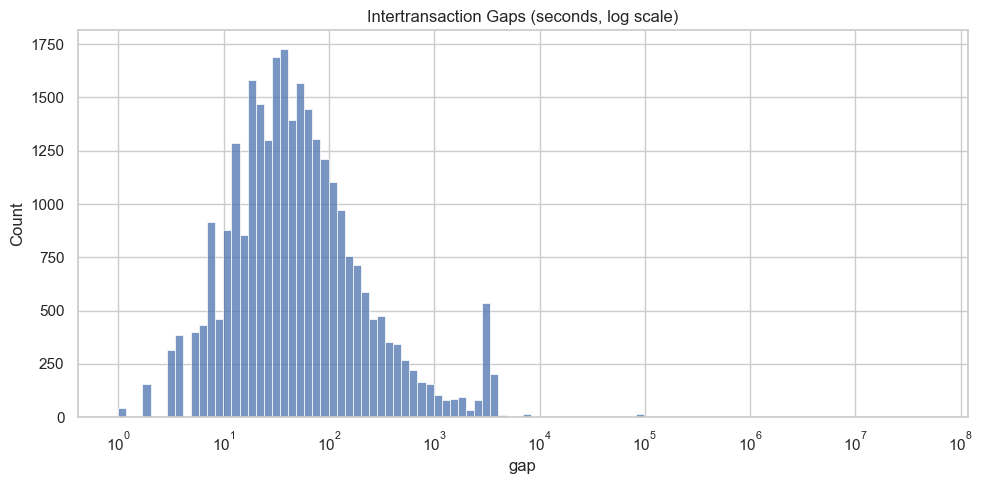


----------------------------------------
Intertransaction Gap CDF
----------------------------------------



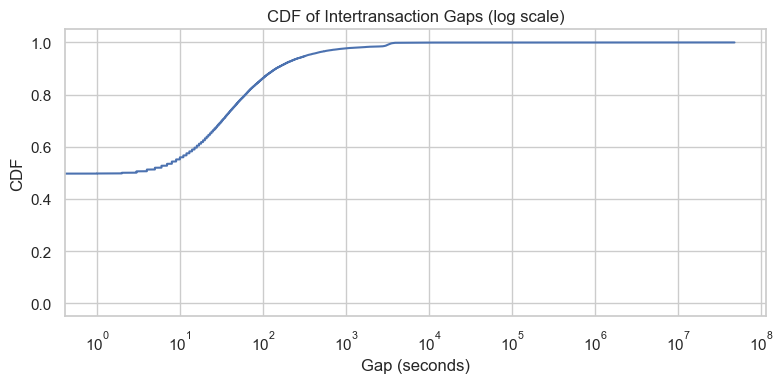

In [13]:
# %%
print_heading("Section 3 — Intertransaction Gaps")

print_sub_heading("Purpose")
print(
    "Time gaps between transactions reveal whether activity is human-paced or bot-like. "
    "Fraudulent wallets often show bursty patterns with very short or very uniform gaps."
)

# Compute differences
df_sorted = df.sort_values("block_timestamp_dt")
df_sorted["gap"] = df_sorted["block_timestamp_dt"].diff().dt.total_seconds()

# Gap histogram (log)
print_sub_heading("Intertransaction Gap Distribution (log histogram)")
sns.histplot(df_sorted['gap'].dropna(), bins=100, log_scale=True)
plt.title("Intertransaction Gaps (seconds, log scale)")
plt.tight_layout()
plt.show()

# Gap CDF
print_sub_heading("Intertransaction Gap CDF")
gaps = df_sorted['gap'].dropna().sort_values()
yvals = np.arange(len(gaps)) / float(len(gaps))
plt.figure(figsize=(8,4))
plt.plot(gaps, yvals)
plt.xscale("log")
plt.title("CDF of Intertransaction Gaps (log scale)")
plt.xlabel("Gap (seconds)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()


Section 4 — Gas & Value Behavior (Cleaned + Joint)


----------------------------------------
Purpose
----------------------------------------

Ethereum economic behavior (gas usage, gas price, and value transferred) reveals wallet intent. Fraudulent wallets often show atypical gas pricing or transaction values. Log histograms and joint density plots help expose that.

----------------------------------------
Gas Distribution (log histogram)
----------------------------------------



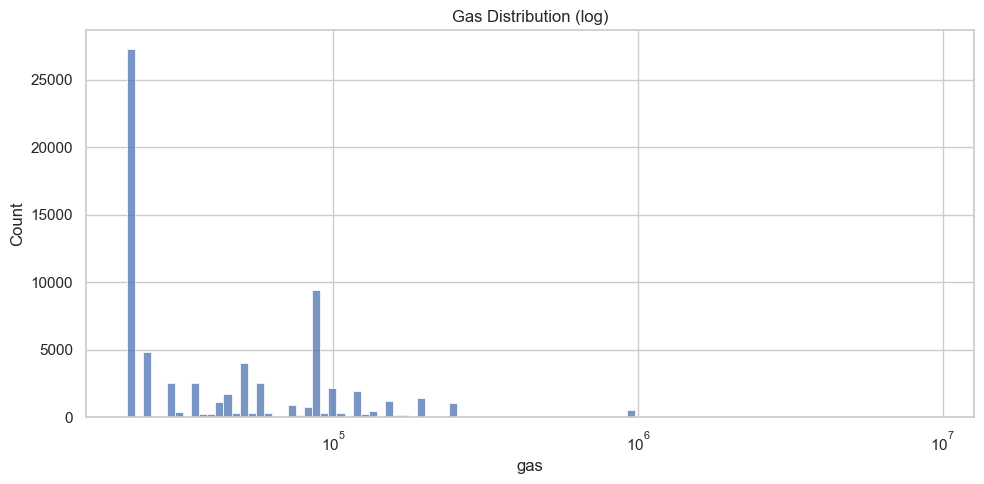


----------------------------------------
Gas Price Distribution (log histogram)
----------------------------------------



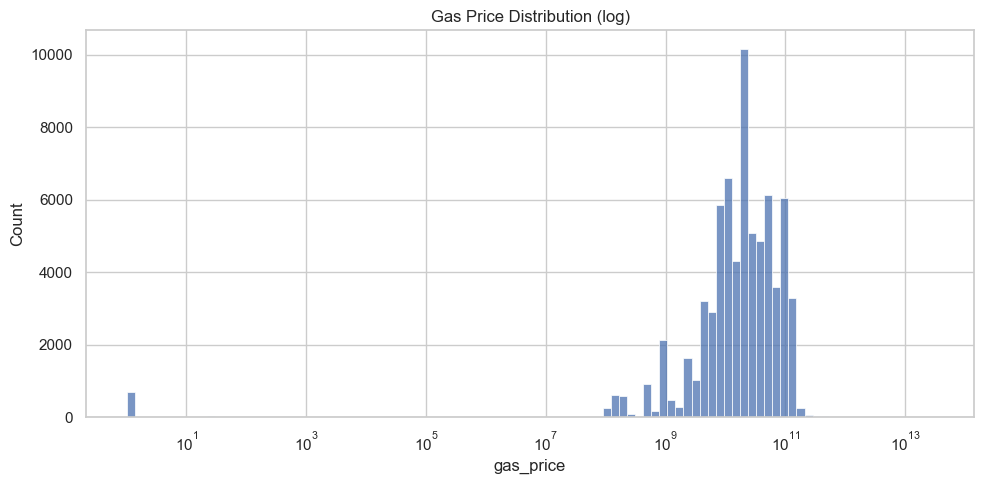


----------------------------------------
Joint Value vs Gas Price (Hexbin, log-log)
----------------------------------------



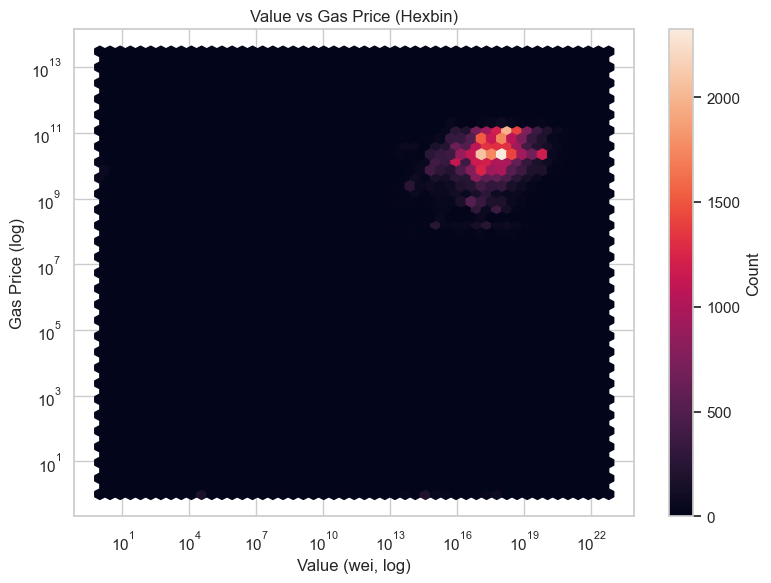

In [14]:
# %%
print_heading("Section 4 — Gas & Value Behavior (Cleaned + Joint)")

print_sub_heading("Purpose")
print(
    "Ethereum economic behavior (gas usage, gas price, and value transferred) "
    "reveals wallet intent. Fraudulent wallets often show atypical gas pricing "
    "or transaction values. Log histograms and joint density plots help expose that."
)

# Gas histogram (log)
print_sub_heading("Gas Distribution (log histogram)")
sns.histplot(df['gas'], bins=100, log_scale=True)
plt.title("Gas Distribution (log)")
plt.tight_layout()
plt.show()

# Gas price histogram (log)
print_sub_heading("Gas Price Distribution (log histogram)")
sns.histplot(df['gas_price'], bins=100, log_scale=True)
plt.title("Gas Price Distribution (log)")
plt.tight_layout()
plt.show()

# Cleaned hexbin
print_sub_heading("Joint Value vs Gas Price (Hexbin, log-log)")

tmp = df[(df['value'] > 0) & (df['gas_price'] > 0)]

plt.figure(figsize=(8,6))
plt.hexbin(tmp['value'], tmp['gas_price'], gridsize=50, xscale='log', yscale='log')
plt.colorbar(label="Count")
plt.xlabel("Value (wei, log)")
plt.ylabel("Gas Price (log)")
plt.title("Value vs Gas Price (Hexbin)")
plt.tight_layout()
plt.show()


Section 5 — Input Length / Transaction Type


----------------------------------------
Purpose
----------------------------------------

The hex-encoded input field reveals whether a transaction is a plain ETH transfer, a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy.

----------------------------------------
Distribution of Input Length
----------------------------------------



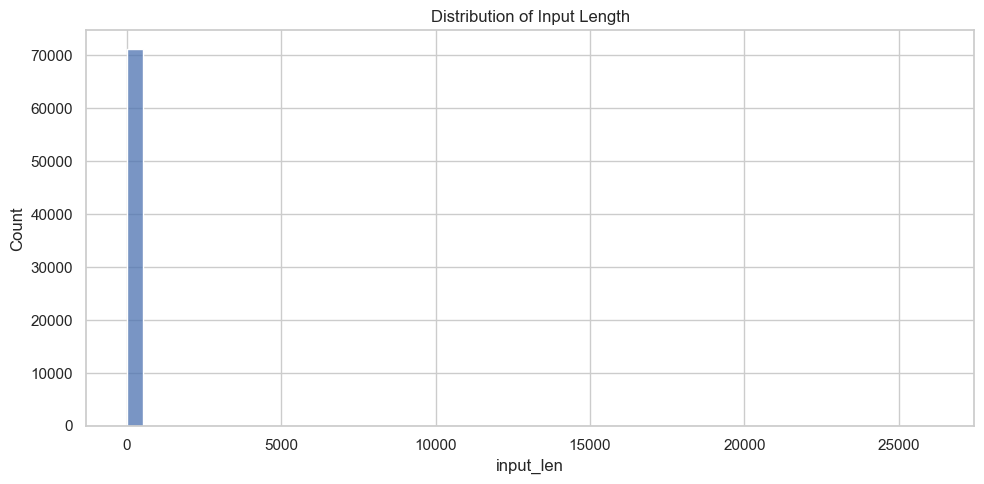


----------------------------------------
Top Input Length Buckets
----------------------------------------



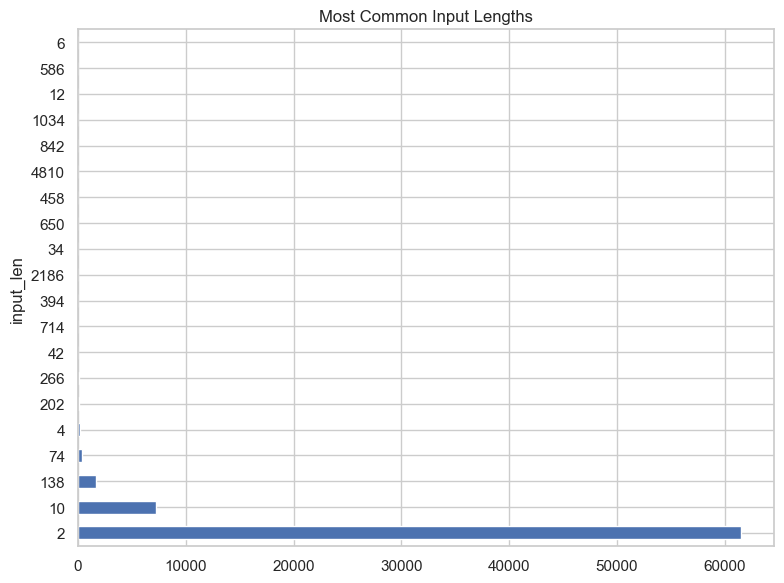

In [15]:
# %%
print_heading("Section 5 — Input Length / Transaction Type")

print_sub_heading("Purpose")
print(
    "The hex-encoded input field reveals whether a transaction is a plain ETH transfer, "
    "a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy."
)

# Compute lengths
df['input_len'] = df['input'].astype(str).apply(len)

# Histogram
print_sub_heading("Distribution of Input Length")
sns.histplot(df['input_len'], bins=50, log_scale=False)
plt.title("Distribution of Input Length")
plt.tight_layout()
plt.show()

# Top buckets
print_sub_heading("Top Input Length Buckets")
df['input_len'].value_counts().head(20).plot(kind='barh', figsize=(8,6))
plt.title("Most Common Input Lengths")
plt.tight_layout()
plt.show()


Section 6 — Address Activity Patterns


----------------------------------------
Purpose
----------------------------------------

Ethereum address activity follows a power-law distribution: a few addresses dominate, while most make only a handful of transactions. Fraud clusters often appear in the tails.

----------------------------------------
Address Rank-Frequency (Zipf Plot)
----------------------------------------



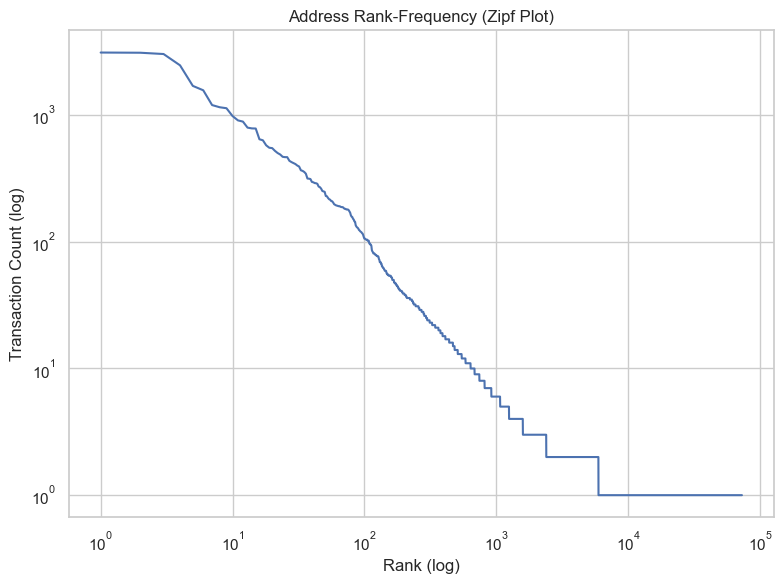


----------------------------------------
In-Degree CDF
----------------------------------------



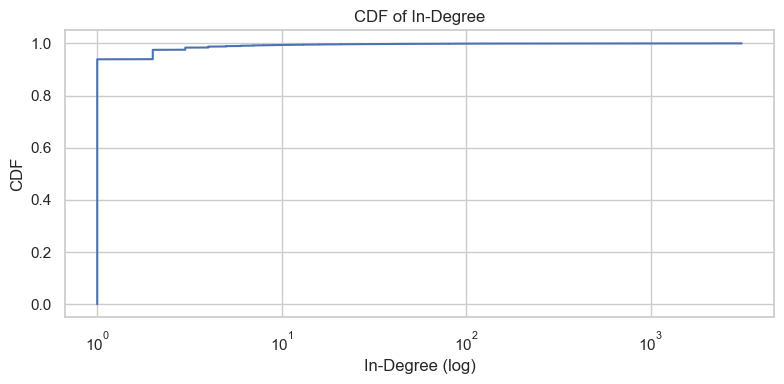


----------------------------------------
Out-Degree CDF
----------------------------------------



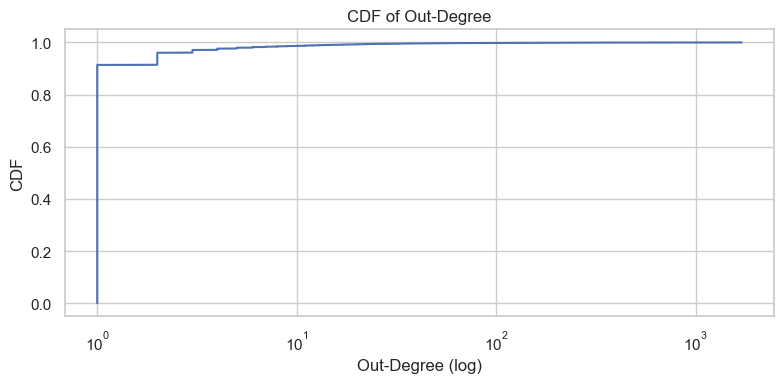

In [16]:
# %%
print_heading("Section 6 — Address Activity Patterns")

print_sub_heading("Purpose")
print(
    "Ethereum address activity follows a power-law distribution: a few addresses dominate, "
    "while most make only a handful of transactions. Fraud clusters often appear in the tails."
)

# Compute counts
from_counts = df['from_address'].value_counts()
to_counts   = df['to_address'].value_counts()
address_counts = from_counts.add(to_counts, fill_value=0)

# Zipf plot
print_sub_heading("Address Rank-Frequency (Zipf Plot)")
rank = np.arange(1, len(address_counts)+1)
freq = np.sort(address_counts.values)[::-1]
plt.figure(figsize=(8,6))
plt.loglog(rank, freq)
plt.xlabel("Rank (log)")
plt.ylabel("Transaction Count (log)")
plt.title("Address Rank-Frequency (Zipf Plot)")
plt.tight_layout()
plt.show()

# In-degree CDF
print_sub_heading("In-Degree CDF")
in_deg = to_counts.sort_values()
cdf = np.arange(len(in_deg)) / len(in_deg)
plt.figure(figsize=(8,4))
plt.plot(in_deg.values, cdf)
plt.xscale("log")
plt.xlabel("In-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of In-Degree")
plt.tight_layout()
plt.show()

# Out-degree CDF
print_sub_heading("Out-Degree CDF")
out_deg = from_counts.sort_values()
cdf = np.arange(len(out_deg)) / len(out_deg)
plt.figure(figsize=(8,4))
plt.plot(out_deg.values, cdf)
plt.xscale("log")
plt.xlabel("Out-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of Out-Degree")
plt.tight_layout()
plt.show()


Section 7 — Scam vs Non-Scam Behavior


----------------------------------------
Purpose
----------------------------------------

Side-by-side distributions expose whether scam-labeled wallets behave differently in value transferred, gas price used, or transaction intent.

----------------------------------------
Value Distribution: Scam vs Non-Scam
----------------------------------------



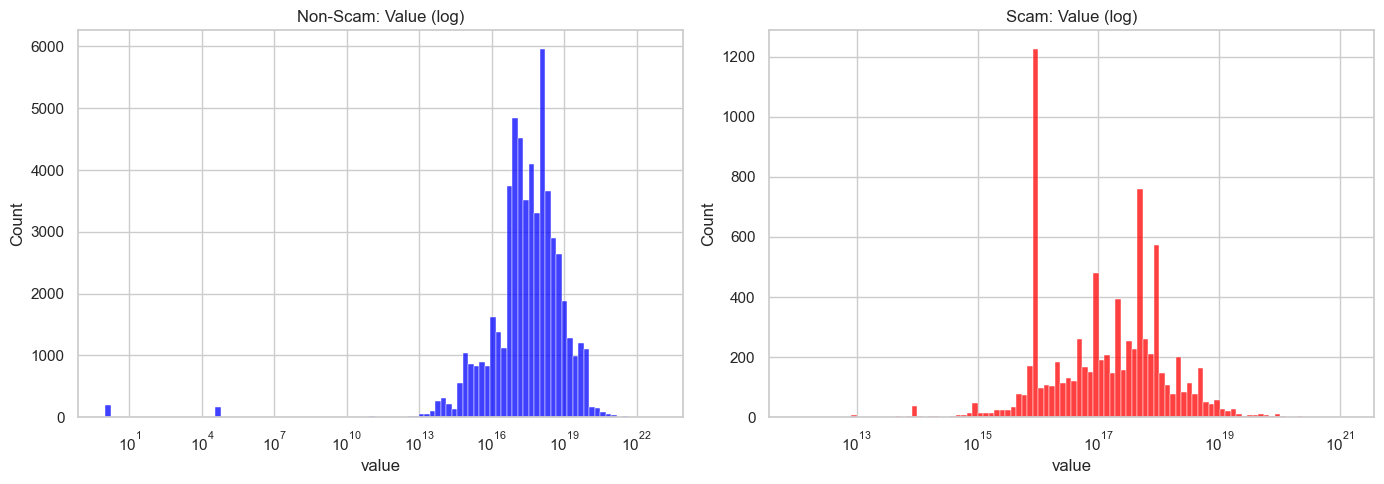


----------------------------------------
Gas Price Distribution: Scam vs Non-Scam
----------------------------------------



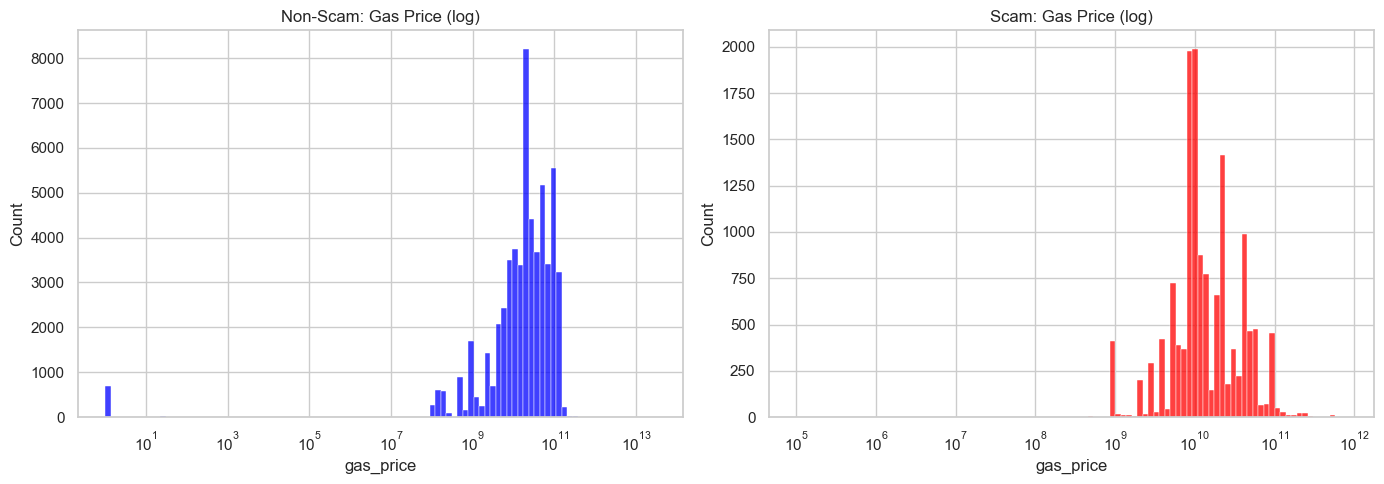


----------------------------------------
Top Non-Missing Categories
----------------------------------------



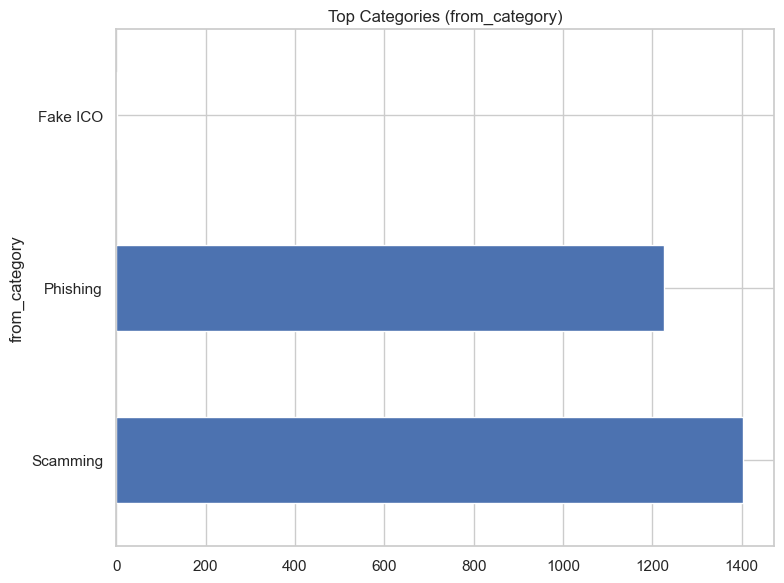

In [17]:
# %%
print_heading("Section 7 — Scam vs Non-Scam Behavior")

print_sub_heading("Purpose")
print(
    "Side-by-side distributions expose whether scam-labeled wallets behave differently "
    "in value transferred, gas price used, or transaction intent."
)

scam_mask = (df['from_scam']==1) | (df['to_scam']==1)

# Side-by-side layout
fig, axes = plt.subplots(1,2, figsize=(14,5))

print_sub_heading("Value Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'value'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Value (log)")
sns.histplot(df.loc[ scam_mask, 'value'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Value (log)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(14,5))
print_sub_heading("Gas Price Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Gas Price (log)")
sns.histplot(df.loc[ scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Gas Price (log)")
plt.tight_layout()
plt.show()

# Top categories
print_sub_heading("Top Non-Missing Categories")
(df['from_category'].dropna().value_counts().head(10)).plot(kind='barh', figsize=(8,6))
plt.title("Top Categories (from_category)")
plt.tight_layout()
plt.show()

In [18]:
# %%
print_heading("EDA Complete — Dataset Ready for Feature Engineering")


EDA Complete — Dataset Ready for Feature Engineering




## **Key Takeaways from the EDA**

The EDA reveals several important structural patterns in the transaction data. These patterns shape both our feature engineering strategy and our expectations for what a predictive model can realistically learn.

---

#### **1. The Dataset Is Not a Continuous Scrape of Ethereum**

The daily transaction volume curve and timestamp normalization step reveal enormous gaps, irregular bursts, and non-uniform coverage. This means we are not looking at a natural stream of blockchain activity—this dataset is a stitched subset.

**Implication for modeling:** 

→ Temporal features should be interpreted as describing *wallet behavior* rather than *global Ethereum trends*.

→ Features like burstiness, intertransaction gaps, and recency are still meaningful because they’re relative within each address’s activity history.

→ But we should not expect weekly/hourly human-rhythm patterns to help; they simply aren’t present.

---

#### **2. Time Gaps Reveal Behavioral Signatures (Bursty vs Human-paced)**

The intertransaction gap histogram (log scale) and CDF show a heavy-tailed distribution with many extremely short gaps. Scam-linked wallets often transact in quick bursts (e.g., draining funds, forwarding ETH, or interacting with phishing contracts).

**Implication for modeling:** 

→ Intertransaction gap statistics (mean, median, max gap, burstiness ratio) are potentially strong differentiators.

→ Time-based irregularity is a behavior worth encoding in the engineered feature set.

---

#### **3. Gas Usage and Gas Price Distributions Are Skewed and Multi-modal**

Both gas and gas-price histograms—on a log scale—show long tails, spikes, and behavior that clusters at specific operational regimes. The joint hexbin plot (value vs gas price) highlights dense “normal” regions versus scattered outliers.

**Implication for modeling:** 

→ Raw values are too skewed for simple thresholds; log transformations or robust scaling help.

→ Address-level aggregates (avg gas price, gas limit, max value sent, etc.) are more stable and meaningful than raw per-transaction fields.

→ Scam addresses may occupy different zones in these joint distributions.

---

#### **4. Input Length Distribution Confirms Transaction Type Variety**

Most transactions have input_len = 2 (“0x”—plain ETH transfers), but a long tail exists for contract interactions and ERC-20 operations.

**Implication for modeling:** 

→ Input complexity is a proxy for interaction type.

→ Aggregating input-length statistics per address may help differentiate “simple transfer wallets” from “smart-contract-heavy wallets.”

---

#### **5. Address Activity Follows a Heavy-Tail Distribution**

The Zipf plot and the in-degree/out-degree CDFs show a classic power-law structure:

* A tiny number of addresses transact heavily,

* while the vast majority interact only once or twice.

**Implication for modeling:** 

→ Transaction count, unique counterparties, and degree-based features are key signals.

→ Scam behavior often shows unusual degrees: either very low diversity (funnels) or very high diversity (spray attacks).

→ Models need normalization or scaling to handle the extreme range in counts.

---

#### **6. Scam vs Non-Scam Comparisons Suggest Real Behavioral Separation**

The side-by-side scam vs non-scam histograms (value, gas price) show visible distribution differences. Scams tend to cluster around particular ranges and show more outliers.

**Implication for modeling:** 

→ There is real signal in the engineered address-level features.

→ The model will likely rely on:

* burstiness,

* value/gas aggregates,

* degree metrics,

* recency and lifespan,

* diversity of counterparties.

---

### **Overall Modeling Expectations**

Taken together, the EDA supports a behavior-driven fraud model:

* Predictive power will come from **address-level behavioral patterns**, not raw transaction-level values.

* Time features matter only in relative terms (per wallet), not globally.

* Degree features, burstiness, activity density, gas/value aggregates, and address lifespan are likely the strongest predictors.

* The model should not expect a clean or balanced dataset; scam behavior is rare and varied.

* Interpretability will come from understanding wallet behavior clusters rather than relying on explicit labels.

This EDA validates the feature engineering direction you’ve taken and gives a realistic picture of what the downstream model can—and cannot—learn from this dataset.


In [19]:

# Feature Engineering (Bulletproof + Row-Safe)

import pandas as pd
import numpy as np
import networkx as nx

SECTION_DIVIDER = '=' * 40
SUB_SECTION_DIVIDER = '-' * 40

def print_heading(title: str):
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


# ============================================================
# 0. WORK FROM A COPY
# ============================================================

print_heading("Preparing Transaction Data for Feature Engineering")

tx = df.copy()
print("Initial row count:", len(tx))


# ============================================================
# 1. BULLETPROOF TIMESTAMP PARSING
# ============================================================

# Use the raw strings
raw_ts = tx['block_timestamp'].astype(str)

# convert wei to ether (leaving commented out for now)
# tx['value'] = tx['value'] / 1e18

# Normalize known patterns
clean_ts = (
    raw_ts.str.replace(" UTC", "", regex=False)
          .str.replace(" UTC+0000", "", regex=False)
          .str.replace("+0000 UTC", "", regex=False)
          .str.replace(" Z", "", regex=False)
          .str.strip()
)

# Parse everything
parsed_ts = pd.to_datetime(clean_ts, utc=True, errors='coerce')

# TRUE timestamp failures
true_bad_mask = parsed_ts.isna()
true_bad_count = true_bad_mask.sum()

print("True unparseable timestamps:", true_bad_count)

if true_bad_count > 0:
    print("Examples:", raw_ts[true_bad_mask].unique()[:10])
    median_ts = parsed_ts[~true_bad_mask].median()
    parsed_ts[true_bad_mask] = median_ts

tx['block_timestamp'] = parsed_ts

# Seconds since dataset start
global_start = tx['block_timestamp'].min()
tx['ts_seconds'] = (tx['block_timestamp'] - global_start).dt.total_seconds()


# ============================================================
# 2. NUMERIC CLEANING — ZERO LOSS
# ============================================================

numeric_cols = [
    'value', 'gas', 'gas_price',
    'receipt_cumulative_gas_used', 'receipt_gas_used'
]

print_heading("Numeric Column Diagnostics")

for col in numeric_cols:
    # Check invalid values BEFORE converting
    raw = tx[col].astype(str)
    bad_mask = pd.to_numeric(raw, errors='coerce').isna()
    bad_count = bad_mask.sum()

    print(f"{col}: invalid={bad_count}")

    # Convert → fill NaN with 0 → no rows dropped
    tx[col] = pd.to_numeric(raw, errors='coerce').fillna(0)

print("Numeric cleaning complete. Rows retained:", len(tx))


# ============================================================
# 3. DEGREE & AMOUNT FEATURES
# ============================================================

print_heading("Degree & Amount Features")

# Degrees
in_degree = tx.groupby('to_address').size().rename('in_degree')
out_degree = tx.groupby('from_address').size().rename('out_degree')
all_degree = in_degree.add(out_degree, fill_value=0).rename('all_degree')

unique_in_degree = (
    tx.groupby('to_address')['from_address']
      .nunique()
      .rename('unique in_degree')
)

unique_out_degree = (
    tx.groupby('from_address')['to_address']
      .nunique()
      .rename('unique out_degree')
)

# Amount stats
incoming_amounts = (
    tx.groupby('to_address')['value']
      .agg(['mean', 'sum', 'max', 'min'])
      .rename(columns={
          'mean': 'Avg amount incoming',
          'sum':  'Total amount incoming',
          'max':  'Max amount incoming',
          'min':  'Min amount incoming',
      })
)

outgoing_amounts = (
    tx.groupby('from_address')['value']
      .agg(['mean', 'sum', 'max', 'min'])
      .rename(columns={
          'mean': 'Avg amount outgoing',
          'sum':  'Total amount outgoing',
          'max':  'Max amount outgoing',
          'min':  'Min amount outgoing',
      })
)


# ============================================================
# 4. BUILD FEATURE TABLE
# ============================================================

all_addresses = (
    pd.concat([tx['from_address'], tx['to_address']])
      .dropna()
      .unique()
)

features = pd.DataFrame(index=all_addresses)
features.index.name = 'Address'

# Join degree features
features = (
    features.join(all_degree, how='left')
            .join(in_degree, how='left')
            .join(out_degree, how='left')
            .join(unique_in_degree, how='left')
            .join(unique_out_degree, how='left')
)

# Join amount features
features = (
    features.join(incoming_amounts, how='left')
            .join(outgoing_amounts, how='left')
)

# Fill 0 for missing numeric combos
features[['all_degree', 'in_degree', 'out_degree',
          'unique in_degree', 'unique out_degree']] = (
    features[['all_degree', 'in_degree', 'out_degree',
              'unique in_degree', 'unique out_degree']]
    .fillna(0)
    .astype(int)
)

amount_cols = [
    'Avg amount incoming', 'Total amount incoming',
    'Max amount incoming', 'Min amount incoming',
    'Avg amount outgoing', 'Total amount outgoing',
    'Max amount outgoing', 'Min amount outgoing',
]

features[amount_cols] = features[amount_cols].fillna(0)



# ============================================================
# 5. TIME-BASED FEATURES
# ============================================================

print_heading("Time-Based Features")

# Long-form table for time + gas stats
incoming_long = tx[['to_address', 'ts_seconds', 'gas', 'gas_price']].rename(
    columns={'to_address': 'Address'}
)
incoming_long['direction'] = 'in'

outgoing_long = tx[['from_address', 'ts_seconds', 'gas', 'gas_price']].rename(
    columns={'from_address': 'Address'}
)
outgoing_long['direction'] = 'out'

long_df = pd.concat([incoming_long, outgoing_long], ignore_index=True)
long_df = long_df.dropna(subset=['Address'])


# ---------- Avg time incoming/outgoing ----------
avg_time_in = (
    long_df[long_df['direction'] == 'in']
    .groupby('Address')['ts_seconds']
    .mean()
    .rename('Avg time incoming')
)

avg_time_out = (
    long_df[long_df['direction'] == 'out']
    .groupby('Address')['ts_seconds']
    .mean()
    .rename('Avg time outgoing')
)

features = features.join(avg_time_in, how='left')
features = features.join(avg_time_out, how='left')

features[['Avg time incoming', 'Avg time outgoing']] = (
    features[['Avg time incoming', 'Avg time outgoing']].fillna(0.0)
)


# ---------- Total transaction time, Active Duration, Intervals ----------
def compute_time_stats(group):
    """Compute lifespan + time interval stats for a single address."""
    times = np.sort(group['ts_seconds'].values)
    if len(times) == 0:
        return pd.Series({
            'Total transaction time': 0.0,
            'Active Duration': 0.0,
            'Mean time interval': 0.0,
            'Max time interval': 0.0,
            'Min time interval': 0.0,
        })

    first = times[0]
    last = times[-1]
    active = last - first

    if len(times) > 1:
        gaps = np.diff(times)
        mean_gap = float(gaps.mean())
        max_gap = float(gaps.max())
        min_gap = float(gaps.min())
        total_tx_time = float(gaps.sum())  # equals last - first
    else:
        mean_gap = max_gap = min_gap = 0.0
        total_tx_time = 0.0

    return pd.Series({
        'Total transaction time': total_tx_time,
        'Active Duration': active,
        'Mean time interval': mean_gap,
        'Max time interval': max_gap,
        'Min time interval': min_gap,
    })

time_stats = long_df.groupby('Address').apply(compute_time_stats)
features = features.join(time_stats, how='left')

for col in [
    'Total transaction time', 'Active Duration',
    'Mean time interval', 'Max time interval', 'Min time interval'
]:
    features[col] = features[col].fillna(0.0)


# ============================================================
# 5B. ADVANCED TEMPORAL BEHAVIOR FEATURES
# ============================================================

print_heading("Advanced Temporal Behavior Features")

# Pre-extract times and hours
long_df['hour'] = (global_start + pd.to_timedelta(long_df['ts_seconds'], unit='s')).dt.hour

# ---- Burstiness (max_gap / median_gap) ----
def compute_burstiness(group):
    times = np.sort(group['ts_seconds'].values)
    if len(times) <= 2:
        return pd.Series({'Burstiness': 0.0})
    gaps = np.diff(times)
    med = np.median(gaps)
    if med == 0:
        return pd.Series({'Burstiness': float(gaps.max())})
    return pd.Series({'Burstiness': float(gaps.max() / med)})

burst = long_df.groupby('Address').apply(compute_burstiness)
features = features.join(burst, how='left')
features['Burstiness'] = features['Burstiness'].fillna(0.0)


# ---- Activity density (#tx / active_duration) ----
density = (
    long_df.groupby('Address')
           .size()
           .rename('Tx count')
)

features = features.join(density, how='left')
features['Tx count'] = features['Tx count'].fillna(0)

features['Activity Density'] = (
    features['Tx count'] / (features['Active Duration'] + 1)
).astype(float)


# ---- Incoming/outgoing ratio ----
incoming_ct = long_df[long_df['direction']=='in'].groupby('Address').size().rename('Incoming count')
outgoing_ct = long_df[long_df['direction']=='out'].groupby('Address').size().rename('Outgoing count')

features = features.join(incoming_ct, how='left')
features = features.join(outgoing_ct, how='left')

features[['Incoming count', 'Outgoing count']] = (
    features[['Incoming count', 'Outgoing count']].fillna(0)
)

features['In/Out Ratio'] = (
    features['Incoming count'] / (features['Outgoing count'] + 1)
).astype(float)


# ---- Hour-of-day entropy + mean hour (SAFE VERSION) ----

records = []

for address, group in long_df.groupby('Address'):
    hours = group['hour'].values
    if len(hours) == 0:
        hour_mean = 0.0
        hour_entropy = 0.0
    else:
        counts = np.bincount(hours, minlength=24)
        total = counts.sum()
        if total == 0:
            hour_mean = 0.0
            hour_entropy = 0.0
        else:
            probs = counts / total
            probs = probs[probs > 0]
            hour_entropy = float(-(probs * np.log2(probs)).sum())
            hour_mean = float(hours.mean())

    records.append((address, hour_mean, hour_entropy))

hour_df = pd.DataFrame(records, columns=['Address', 'Hour mean', 'Hour entropy'])
hour_df = hour_df.set_index('Address')

features = features.join(hour_df, how='left')

features[['Hour mean', 'Hour entropy']] = (
    features[['Hour mean', 'Hour entropy']].fillna(0.0)
)


# ---- Recency (how recently the address was active) ----
dataset_end = tx['ts_seconds'].max()

last_seen = (
    long_df.groupby('Address')['ts_seconds']
           .max()
           .rename('Last seen')
)

features = features.join(last_seen, how='left')
features['Last seen'] = features['Last seen'].fillna(0.0)

features['Recency'] = dataset_end - features['Last seen']
features['Recency'] = features['Recency'].astype(float)

# ============================================================
# 6. GAS FEATURES
# ============================================================

print_heading("Gas-Based Features")

avg_gas_price = (
    long_df.groupby('Address')['gas_price']
           .mean()
           .rename('Avg gas price')
)

avg_gas_limit = (
    long_df.groupby('Address')['gas']
           .mean()
           .rename('Avg gas limit')
)

features = features.join(avg_gas_price, how='left')
features = features.join(avg_gas_limit, how='left')

features[['Avg gas price', 'Avg gas limit']] = (
    features[['Avg gas price', 'Avg gas limit']].fillna(0.0)
)


# ============================================================
# 7. GRAPH CLUSTERING COEFFICIENT
# ============================================================

print_heading("Graph Features (Clustering Coefficient)")

# Build an undirected graph from transaction edges
G = nx.Graph()
edges = tx[['from_address', 'to_address']].dropna()
G.add_edges_from(edges.itertuples(index=False, name=None))

# Compute clustering coefficient per node
cluster_series = pd.Series(nx.clustering(G), name='Clustering coefficient')

features = features.join(cluster_series, how='left')
features['Clustering coefficient'] = features['Clustering coefficient'].fillna(0.0)


# ============================================================
# 8. SCAM LABEL
# ============================================================

print_heading("Scam Labeling")

def is_scam_category(x):
    if pd.isna(x): 
        return False
    x = str(x).lower()
    return ('scam' in x) or ('fraud' in x) or ('phish' in x)

# Transaction-level flags
tx['from_is_scam'] = (
    (tx.get('from_scam', 0) == 1) |
    tx['from_category'].apply(is_scam_category)
)

tx['to_is_scam'] = (
    (tx.get('to_scam', 0) == 1) |
    tx['to_category'].apply(is_scam_category)
)

scam_addresses = pd.Index(
    pd.concat([
        tx.loc[tx['from_is_scam'], 'from_address'],
        tx.loc[tx['to_is_scam'], 'to_address']
    ])
).dropna().unique()

scam_series = pd.Series(0, index=features.index, name='Scam')
scam_series.loc[scam_addresses] = 1

features = features.join(scam_series, how='left')
features['Scam'] = features['Scam'].fillna(0).astype(int)

# ============================================================
# ORDER COLUMNS (Updated with advanced temporal features)
# ============================================================

ordered_cols = [

    # --- degree features ---
    'all_degree', 'in_degree', 'out_degree',
    'unique in_degree', 'unique out_degree',

    # --- amount features ---
    'Avg amount incoming', 'Total amount incoming',
    'Max amount incoming', 'Min amount incoming',
    'Avg amount outgoing', 'Total amount outgoing',
    'Max amount outgoing', 'Min amount outgoing',

    # --- core time features ---
    'Avg time incoming', 'Avg time outgoing',
    'Total transaction time', 'Active Duration',
    'Mean time interval', 'Max time interval', 'Min time interval',

    # --- advanced temporal-behavior features ---
    'Burstiness',
    'Tx count', 'Activity Density',
    'Incoming count', 'Outgoing count', 'In/Out Ratio',
    'Hour mean', 'Hour entropy',
    'Last seen', 'Recency',

    # --- gas features ---
    'Avg gas price', 'Avg gas limit',

    # --- graph ---
    'Clustering coefficient',

    # --- target label ---
    'Scam',
]

features = features[ordered_cols]


# ============================================================
# FINAL PREVIEW
# ============================================================

print_sub_heading("Final Feature Table Sample")
display(features.head())

print("Total addresses:", len(features))
print("Total scam labels:", features['Scam'].sum())





Preparing Transaction Data for Feature Engineering

Initial row count: 71250
True unparseable timestamps: 14250
Examples: ['2017-10-16 08:31:44+00:00' '2017-10-16 11:08:20+00:00'
 '2017-10-16 16:40:24+00:00' '2017-10-16 19:47:29+00:00'
 '2017-10-16 22:04:16+00:00' '2017-10-17 05:53:01+00:00'
 '2017-10-17 08:59:11+00:00' '2017-10-17 09:00:58+00:00'
 '2017-10-17 15:59:43+00:00' '2017-10-17 16:00:01+00:00']

Numeric Column Diagnostics

value: invalid=0
gas: invalid=0
gas_price: invalid=0
receipt_cumulative_gas_used: invalid=0
receipt_gas_used: invalid=0
Numeric cleaning complete. Rows retained: 71250

Degree & Amount Features


Time-Based Features



/var/folders/nf/tn5571297x1_h_3dc_3ggtww0000gp/T/ipykernel_10205/359786373.py:266: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_stats = long_df.groupby('Address').apply(compute_time_stats)



Advanced Temporal Behavior Features



/var/folders/nf/tn5571297x1_h_3dc_3ggtww0000gp/T/ipykernel_10205/359786373.py:296: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  burst = long_df.groupby('Address').apply(compute_burstiness)



Gas-Based Features


Graph Features (Clustering Coefficient)


Scam Labeling


----------------------------------------
Final Feature Table Sample
----------------------------------------



,all_degree,in_degree,out_degree,unique in_degree,unique out_degree,Avg amount incoming,Total amount incoming,Max amount incoming,Min amount incoming,Avg amount outgoing,...,Outgoing count,In/Out Ratio,Hour mean,Hour entropy,Last seen,Recency,Avg gas price,Avg gas limit,Clustering coefficient,Scam
Address,,,,,,,,,,,,,,,,,,,,,
0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,1702,1,1701,1,1567,1.000000e+16,1.000000e+16,1.000000e+16,1.000000e+16,1.106280e+19,...,1701.0,0.000588,13.166863,4.422034,14214201.0,48060563.0,6.459977e+10,31551.116334,8.150218e-07,0
0x304cc179719bc5b05418d6f7f6783abe45d83090,315,189,126,189,116,2.987973e+17,5.647270e+19,3.190000e+19,4.079820e+12,2.405875e+17,...,126.0,1.488189,8.555556,3.740761,11165717.0,51109047.0,7.040660e+09,48600.000000,0.000000e+00,0
0x323b10c39732f689a4763fbeebc2347a24b863e2,1,0,1,0,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.960000e+16,...,1.0,0.000000,5.000000,-0.000000,283.0,62274481.0,2.060947e+10,21000.000000,0.000000e+00,0
0x44de2e2b1f378d51e0d2a2ae5ebe4d427ab955a9,466,80,386,80,343,2.340084e+18,1.872067e+20,1.020000e+20,3.470000e+16,2.282073e+17,...,386.0,0.206718,11.257511,4.502845,1257200.0,61017564.0,6.430423e+09,103832.618026,0.000000e+00,0
0xd063435d7cab1a792e1d56f7aab04313b3d87179,23,0,23,0,23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.647826e+18,...,23.0,0.000000,7.260870,2.381774,730529.0,61544235.0,6.110000e+10,42000.000000,0.000000e+00,0


Total addresses: 73034
Total scam labels: 169


In [20]:
print_heading("Saving Features")

features_path_csv = "data/address_features.csv"
features_path_parquet = "data/address_features.parquet"

features.to_csv(features_path_csv)
features.to_parquet(features_path_parquet)

print("Saved CSV →", features_path_csv)
print("Saved Parquet →", features_path_parquet)


Saving Features

Saved CSV → data/address_features.csv
Saved Parquet → data/address_features.parquet


### Engineered Address-Level Feature Table — Feature Dictionary

Index: each row corresponds to a unique Ethereum `Address` (string), aggregated over all transactions.

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| all_degree | int | Total number of tx edges (in + out) for address | analysis | in_degree + out_degree over full dataset |
| in_degree | int | Count of incoming txs to address | analysis | Number of rows where address is `to_address` |
| out_degree | int | Count of outgoing txs from address | analysis | Number of rows where address is `from_address` |
| unique in_degree | int | Number of distinct senders to this address | analysis | Unique `from_address` values seen as incoming |
| unique out_degree | int | Number of distinct recipients from this address | analysis | Unique `to_address` values seen as outgoing |
| Avg amount incoming | float | Mean incoming transfer value (wei) | analysis | Averaged over all txs where address is recipient |
| Total amount incoming | float | Sum of incoming transfer value (wei) | analysis | Total ETH in wei received |
| Max amount incoming | float | Maximum single incoming value (wei) | analysis | Largest inbound transfer |
| Min amount incoming | float | Minimum single incoming value (wei) | analysis | Smallest inbound transfer (0 if none) |
| Avg amount outgoing | float | Mean outgoing transfer value (wei) | analysis | Averaged over all txs sent by address |
| Total amount outgoing | float | Sum of outgoing transfer value (wei) | analysis | Total ETH in wei sent |
| Max amount outgoing | float | Maximum single outgoing value (wei) | analysis | Largest outbound transfer |
| Min amount outgoing | float | Minimum single outgoing value (wei) | analysis | Smallest outbound transfer (0 if none) |
| Avg time incoming | float | Mean timestamp of incoming txs (seconds) | analysis | Seconds since earliest block in dataset |
| Avg time outgoing | float | Mean timestamp of outgoing txs (seconds) | analysis | Seconds since earliest block in dataset |
| Total transaction time | float | Sum of gaps between consecutive txs (s) | analysis | For this address; equals last_time − first_time when ≥2 txs |
| Active Duration | float | Lifespan between first and last tx (s) | analysis | 0 if only a single tx |
| Mean time interval | float | Mean gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Max time interval | float | Largest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Min time interval | float | Smallest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Burstiness | float | max_gap / median_gap of tx times | analysis | 0 for ≤2 txs; higher = more bursty activity |
| Tx count | float | Total number of txs (in + out) | analysis | Same scale as all_degree; stored as numeric |
| Activity Density | float | Tx count per second of Active Duration | analysis | `Tx count / (Active Duration + 1)` to avoid division by zero |
| Incoming count | float | Number of incoming txs | analysis | Count of records where address is recipient |
| Outgoing count | float | Number of outgoing txs | analysis | Count of records where address is sender |
| In/Out Ratio | float | Incoming count divided by (Outgoing count + 1) | analysis | Higher values = sink-like behavior |
| Hour mean | float | Mean hour of day of activity (0–23) | analysis | Computed from UTC timestamps across all txs |
| Hour entropy | float | Entropy of hourly activity distribution (bits) | analysis | 0 = all txs at one hour; higher = spread across hours |
| Last seen | float | Timestamp of most recent tx (s) | analysis | Seconds since earliest block in dataset |
| Recency | float | How long before dataset end address was last active (s) | analysis | `dataset_end_ts_seconds − Last seen` |
| Avg gas price | float | Mean gas price used by address (wei per gas) | analysis | Aggregated across all in/out txs |
| Avg gas limit | float | Mean gas limit on txs involving address | analysis | Aggregated across all in/out txs |
| Clustering coefficient | float | Local graph clustering of address | analysis | Undirected graph; range [0, 1] |
| Scam | int (0/1) | Address labeled as scam-related | target | Derived from from_scam/to_scam and *_category text |

In [21]:
# %% [markdown]
# # Baseline Modeling — Address-Level Scam Prediction

# %%
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
)

SECTION_DIVIDER = "=" * 40
SUB_SECTION_DIVIDER = "-" * 40

def print_heading(title: str):
    print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

def print_sub_heading(title: str):
    print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


# ============================================================
# 1. LOAD ENGINEERED FEATURES
# ============================================================

print_heading("Loading Engineered Address Features")

features_path_csv = "data/address_features.csv"
features = pd.read_csv(features_path_csv, index_col=0)

print("Shape:", features.shape)
print("Columns:", list(features.columns))

# Target and features
TARGET_COL = "Scam"
y = features[TARGET_COL].astype(int).values
X = features.drop(columns=[TARGET_COL])

print("Positive (scam) count:", int(y.sum()))
print("Negative (non-scam) count:", int((y == 0).sum()))


# ============================================================
# 2. TRAIN / VAL / TEST SPLIT (STRATIFIED)
# ============================================================

print_heading("Train / Validation / Test Split")

# First: train+val vs test (15% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    stratify=y,
    random_state=42,
)

# Then: train vs val (val ≈ 15% of total)
val_size_rel = 0.15 / 0.85  # so test=15%, val≈15%, train≈70%
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=val_size_rel,
    stratify=y_trainval,
    random_state=42,
)

print("Train size:", X_train.shape[0])
print("Val size:  ", X_val.shape[0])
print("Test size: ", X_test.shape[0])

# ============================================================
# 3. SCALING FOR LINEAR / NN MODELS
# ============================================================

print_heading("Scaling Numeric Features (for Linear/NN Models)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# For trees / XGBoost we will use unscaled X_*


# ============================================================
# 4. EVALUATION UTILITIES
# ============================================================

def get_probas(model, X):
    """Return probability for class 1 (scam) if possible; fall back to decision_function."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        # scale to [0, 1] roughly for metrics that expect scores
        scores = model.decision_function(X)
        # min-max normalize
        s_min, s_max = scores.min(), scores.max()
        if s_max == s_min:
            return np.zeros_like(scores)
        return (scores - s_min) / (s_max - s_min)
    # fallback: hard predictions -> {0,1}
    return model.predict(X)


def evaluate_split(y_true, y_prob, threshold=0.5):
    """Compute key metrics for a single split."""
    y_pred = (y_prob >= threshold).astype(int)
    metrics = {}
    metrics["accuracy"] = accuracy_score(y_true, y_pred)
    metrics["precision"] = precision_score(y_true, y_pred, zero_division=0)
    metrics["recall"] = recall_score(y_true, y_pred, zero_division=0)
    metrics["f1"] = f1_score(y_true, y_pred, zero_division=0)

    # Handle edge cases for AUC metrics
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
    except ValueError:
        metrics["roc_auc"] = np.nan

    try:
        metrics["avg_precision"] = average_precision_score(y_true, y_prob)
    except ValueError:
        metrics["avg_precision"] = np.nan

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics["cm"] = cm
    return metrics


def evaluate_model(name, model, X_train_in, y_train_in,
                   X_val_in, y_val_in,
                   X_test_in, y_test_in,
                   threshold=0.5):
    """Fit model, evaluate on train/val/test, and return metrics dict."""
    print_sub_heading(f"Fitting {name}")
    model.fit(X_train_in, y_train_in)

    print("Scoring...")
    prob_train = get_probas(model, X_train_in)
    prob_val   = get_probas(model, X_val_in)
    prob_test  = get_probas(model, X_test_in)

    train_metrics = evaluate_split(y_train_in, prob_train, threshold=threshold)
    val_metrics   = evaluate_split(y_val_in, prob_val, threshold=threshold)
    test_metrics  = evaluate_split(y_test_in, prob_test, threshold=threshold)

    print(f"{name} — Validation metrics:")
    for k in ["accuracy", "precision", "recall", "f1", "roc_auc", "avg_precision"]:
        print(f"  val_{k}: {val_metrics[k]:.4f}")

    print("Confusion matrix (val):")
    print(val_metrics["cm"])

    return {
        "model_name": name,
        "model": model,
        "train": train_metrics,
        "val": val_metrics,
        "test": test_metrics,
    }


# ============================================================
# 5. MODEL DEFINITIONS
# ============================================================

print_heading("Defining Baseline Models")

baseline_models = []

# Logistic Regression (balanced)
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1,
    solver="lbfgs",
)
baseline_models.append(("LogisticRegression", log_reg, "scaled"))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("RandomForest", rf, "raw"))

# ExtraTrees
et = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("ExtraTrees", et, "raw"))

# Try XGBoost if available
try:
    from xgboost import XGBClassifier

    # Class imbalance handling
    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()
    scale_pos_weight = neg / max(pos, 1)

    xgb = XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
    )
    baseline_models.append(("XGBoost", xgb, "raw"))
    print("XGBoost available and added.")
except ImportError:
    print("XGBoost not installed; skipping XGBoost baseline.")


# Simple MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-3,
    batch_size=256,
    learning_rate="adaptive",
    max_iter=50,
    early_stopping=True,
    random_state=42,
)
baseline_models.append(("MLP", mlp, "scaled"))


# ============================================================
# 6. RUN BASELINES
# ============================================================

print_heading("Running Baseline Models")

results = []

for name, model, space in baseline_models:
    if space == "scaled":
        Xtr, Xv, Xte = X_train_scaled, X_val_scaled, X_test_scaled
    else:
        Xtr, Xv, Xte = X_train, X_val, X_test

    res = evaluate_model(
        name,
        model,
        Xtr, y_train,
        Xv, y_val,
        Xte, y_test,
        threshold=0.5,   # can tune later if needed
    )
    results.append(res)


# ============================================================
# 7. COMPARISON TABLE
# ============================================================

print_heading("Baseline Model Comparison (Validation & Test)")

rows = []
for r in results:
    name = r["model_name"]
    for split in ["val", "test"]:
        m = r[split]
        rows.append({
            "model": name,
            "split": split,
            "accuracy": m["accuracy"],
            "precision": m["precision"],
            "recall": m["recall"],
            "f1": m["f1"],
            "roc_auc": m["roc_auc"],
            "avg_precision": m["avg_precision"],
        })

comparison_df = pd.DataFrame(rows)
display(comparison_df.sort_values(["split", "avg_precision"], ascending=[True, False]))


Loading Engineered Address Features

Shape: (73034, 34)
Columns: ['all_degree', 'in_degree', 'out_degree', 'unique in_degree', 'unique out_degree', 'Avg amount incoming', 'Total amount incoming', 'Max amount incoming', 'Min amount incoming', 'Avg amount outgoing', 'Total amount outgoing', 'Max amount outgoing', 'Min amount outgoing', 'Avg time incoming', 'Avg time outgoing', 'Total transaction time', 'Active Duration', 'Mean time interval', 'Max time interval', 'Min time interval', 'Burstiness', 'Tx count', 'Activity Density', 'Incoming count', 'Outgoing count', 'In/Out Ratio', 'Hour mean', 'Hour entropy', 'Last seen', 'Recency', 'Avg gas price', 'Avg gas limit', 'Clustering coefficient', 'Scam']
Positive (scam) count: 169
Negative (non-scam) count: 72865

Train / Validation / Test Split

Train size: 51123
Val size:   10955
Test size:  10956

Scaling Numeric Features (for Linear/NN Models)


Defining Baseline Models

XGBoost available and added.

Running Baseline Models


------------

,model,split,accuracy,precision,recall,f1,roc_auc,avg_precision
7,XGBoost,test,0.999361,0.846154,0.88,0.862745,0.999217,0.926716
3,RandomForest,test,0.999452,1.000000,0.76,0.863636,0.999618,0.922909
5,ExtraTrees,test,0.999270,0.947368,0.72,0.818182,0.999583,0.906609
1,LogisticRegression,test,0.993702,0.265957,1.00,0.420168,0.999107,0.716549
9,MLP,test,0.998996,0.818182,0.72,0.765957,0.999186,0.711810
6,XGBoost,val,0.999452,0.806452,1.00,0.892857,0.999956,0.982534
2,RandomForest,val,0.999361,0.909091,0.80,0.851064,0.999861,0.952511
4,ExtraTrees,val,0.999270,0.904762,0.76,0.826087,0.999806,0.928636
8,MLP,val,0.999361,0.909091,0.80,0.851064,0.996494,0.909421
0,LogisticRegression,val,0.993884,0.266667,0.96,0.417391,0.998112,0.617531
